In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Markov Chain
A markov chain is a concept in probability theory that models the change of states over time. 
For example:

I have 3 towns, town A, B and C

* 30% of Town A will move to town B
* 20% of Town A will move to town C

* 50% of Town B will move to town A
* 10% of Town B will move to town C

* 70% of Town C will move to town A
* 10% of Town C will mvoe to town B

We can model this as a matrix:
Each row corresponds the source, and each column represents the destination

In [3]:
chain = np.array([[.5,.3,.2],[.5,.4,.1],[.7,.1,.2]])
chain

array([[0.5, 0.3, 0.2],
       [0.5, 0.4, 0.1],
       [0.7, 0.1, 0.2]])

This is known as the transition matrix, its properties are as follows:
* Each entry represents probability of moving from one state (row) to another state (column)
    P(next state in column n | current state in row m)
    
* Eeach row adds to 1
* 0 < All Entries < 1

To represent a given state, we use a State Vector, this is a vector of size 1 x n, where:
* 1 column for each state
* The sum of all entries must equal 1
* Each entry is a probability between 0 and 1


In [4]:
v0 = np.array([.6,.3,.1])
v0

array([0.6, 0.3, 0.1])

The distribution after 1 transition given the state vector and transition matrix is as follows

In [5]:
v1 = v0 @ chain
v1

array([0.52, 0.31, 0.17])

The next transition would use v1

In [6]:
v2 = v1 @ chain
v2

array([0.534, 0.297, 0.169])

Therefore, $V_n$ = $V_0$$T^n$

In [7]:
t8 = np.linalg.matrix_power(chain, 8)
v8 = v0 @ t8
v8

array([0.53409085, 0.29545467, 0.17045448])

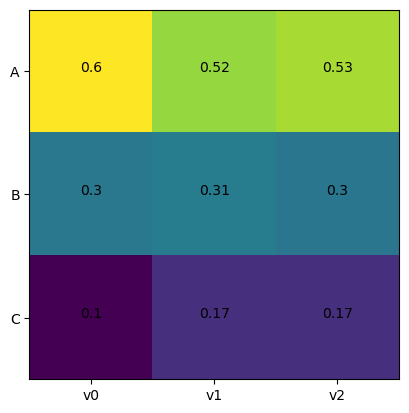

In [28]:
states = np.array([v0,v1,v2])
ylabels = ["A", "B", "C"]
xlabels =["v0", "v1", "v2"]
fig, ax = plt.subplots()
im = ax.imshow(states.T)
states = np.round(states, 2)
ax.set_yticks(np.arange(len(ylabels)), ylabels)
ax.set_xticks(np.arange(len(xlabels)), xlabels)
for i in range(len(ylabels)):
    for j in range(len(xlabels)):
        text = ax.text(j,i,(states.T)[i,j], ha="center")

In [44]:
def dispChain(states):
    ylabels = []
    xlabels = []
    for i in range(0,states.shape[0]):
        ylabels.append(str(i))
    for i in range(0, states.shape[1]):
        xlabels.append("v" + str(i))
    fig, ax = plt.subplots()
    im = ax.imshow(states)
    states = np.round(states, 2)
    ax.set_yticks(np.arange(len(ylabels)), ylabels)
    ax.set_xticks(np.arange(len(xlabels)), xlabels)
    for i in range(len(ylabels)):
        for j in range(len(xlabels)):
            text = ax.text(j,i,(states)[i,j], ha="center")

# Markov chain with end state
We will define some transition matrix


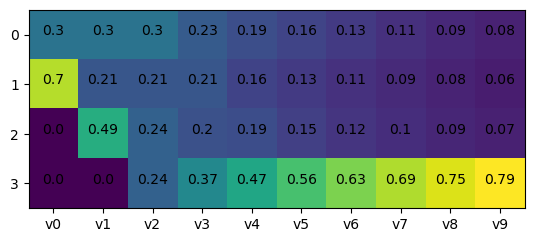

In [47]:
t0 = np.array([[.3,.7,0,0], [.3, 0, .7, 0], [.3,0,.2,.5],[0,0,0,1]])
v0 = np.array([1,0,0,0])
vi = v0
states = []
for i in range(0,10):
    vi = vi @ t0
    states.append(vi)
states = np.array(states)
states
dispChain(states.T)